# MIGMOBS

**Natalia Dedandi**



##Exploratory migration data



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# prompt: open a csv file forma drive folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


## Migration data

from:

https://riks.cris.unu.edu/annual-bilateral-migration-data


In [ ]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/migration_imputed_RIKS_dec2021.csv'

df_bilateral_mig = pd.read_csv(file_path)
print(df_bilateral_mig.head())

  iso_or               origin iso_des destination  year  stock  flow  inflow  \
0    AAB  Antigua and Barbuda     ABW       Aruba  1960     16   NaN     NaN   
1    AAB  Antigua and Barbuda     ABW       Aruba  1961     16   0.0     NaN   
2    AAB  Antigua and Barbuda     ABW       Aruba  1962     15  -1.0     NaN   
3    AAB  Antigua and Barbuda     ABW       Aruba  1963     15   0.0     NaN   
4    AAB  Antigua and Barbuda     ABW       Aruba  1964     15   0.0     NaN   

   outflow  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  


In [ ]:
countries = ['ARG', 'CHL','BOL','VEN']
latam_mig_df = df_bilateral_mig[df_bilateral_mig['iso_des'].isin(countries)]


In [ ]:
latam_mig_df_grp = latam_mig_df.groupby(['year', 'iso_des'])['stock'].sum().reset_index()
latam_mig_df_grp

,year,iso_des,stock
0,1960,ARG,2683416
1,1960,BOL,43730
2,1960,CHL,109563
3,1960,VEN,510822
4,1961,ARG,2630230
...,...,...,...
239,2019,VEN,1343206
240,2020,ARG,2245714
241,2020,BOL,160289
242,2020,CHL,1601702


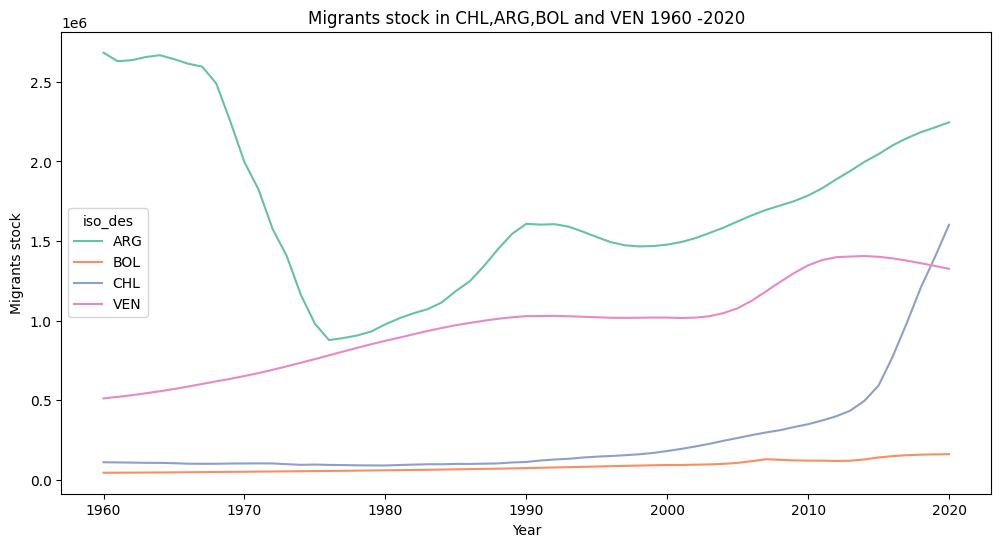

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_des', data=latam_mig_df_grp, palette = "Set2")
plt.title('Migrants stock in CHL,ARG,BOL and VEN 1960 -2020')
plt.xlabel('Year')
plt.ylabel('Migrants stock')
plt.show()

Para analizar la % de migrantes tomo la base de población ONU y estos datos de CRIS. El indicador de Banco Mundial (I3.2 International migrant stock (% of population) tiene muchos valores ausentes.

Falta verificar si hay mejores datos

Ya tengo en el DF population los datos de la población para ARG y CHL entre 1960 y 2020

In [ ]:
latam_mig_df_grp = latam_mig_df_grp.rename(columns={'iso_des': 'country_code'})

In [ ]:
# Combinar los datos por país y año
merged_data = pd.merge(latam_mig_df_grp, population_data, on=['country_code', 'year'], how='inner')

# Calcular la nueva variable
merged_data['migration_proportion'] = merged_data['stock'] / merged_data['total_population_wb']

# Mostrar las primeras filas del resultado
print(merged_data.head())

   year country_code    stock  total_population_wb  migration_proportion
0  1960          ARG  2683416           20386045.0              0.131630
1  1960          CHL   109563            8153350.0              0.013438
2  1961          ARG  2630230           20726276.0              0.126903
3  1961          CHL   108385            8324802.0              0.013020
4  1962          ARG  2636364           21072538.0              0.125109


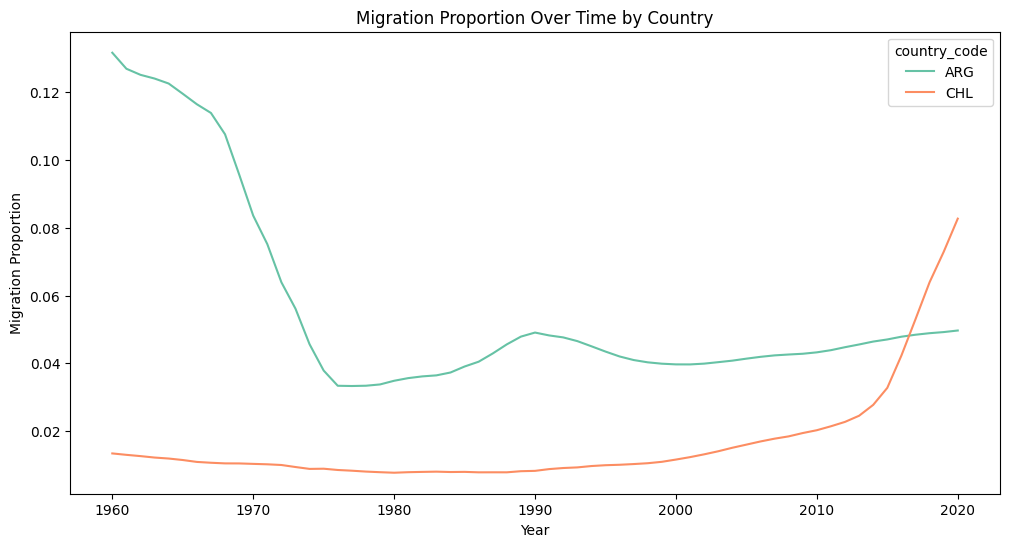

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='migration_proportion', hue='country_code', data=merged_data, palette = "Set2")
plt.title('Migration Proportion Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Migration Proportion')
plt.show()

In [ ]:
top5_iso_or_arg = latam_mig_df[latam_mig_df['iso_des'] == 'ARG'].groupby(['year', 'iso_or'])['stock'].sum().reset_index()
top5_iso_or_arg = top5_iso_or_arg.sort_values(['year', 'stock'], ascending=[True, False]).groupby('year').head(5)
top5_iso_or_arg

,year,iso_or,stock
96,1960,ITA,922057
185,1960,SPN,745871
151,1960,PAR,158613
38,1960,CHL,116570
156,1960,POL,113675
...,...,...,...
13153,2020,PAR,685696
13075,2020,BOL,423522
13082,2020,CHL,215150
13154,2020,PER,197795


Obtengo todos los paises que fueron top 5 desde 1960 y se grafican los cambios

In [ ]:
print(top5_iso_or_arg['iso_or'].unique())

['ITA' 'SPN' 'PAR' 'CHL' 'POL' 'URU' 'BOL' 'SUN' 'YUG' 'PER' 'VEN']


In [ ]:
origin_list=['ITA','SPN','PAR','CHL','POL','URU','BOL','SUN','YUG','PER','VEN']



In [ ]:
# prompt: filtrar latam_mig_df  por iso_des = ARG y iso_orig i origin_list

historic_top5_arg = latam_mig_df[(latam_mig_df['iso_des'] == 'ARG') & (latam_mig_df['iso_or'].isin(origin_list))]
historic_top5_arg.head()

,iso_or,origin,iso_des,destination,year,stock,flow,inflow,outflow
332920,BOL,Bolivia,ARG,Argentina,1960,93271,NaN,NaN,9145.0
332921,BOL,Bolivia,ARG,Argentina,1961,93772,1315.0,14609.0,13294.0
332922,BOL,Bolivia,ARG,Argentina,1962,92958,9.0,15025.0,15016.0
332923,BOL,Bolivia,ARG,Argentina,1963,91235,-902.0,15555.0,16457.0
332924,BOL,Bolivia,ARG,Argentina,1964,93882,3457.0,15677.0,12220.0


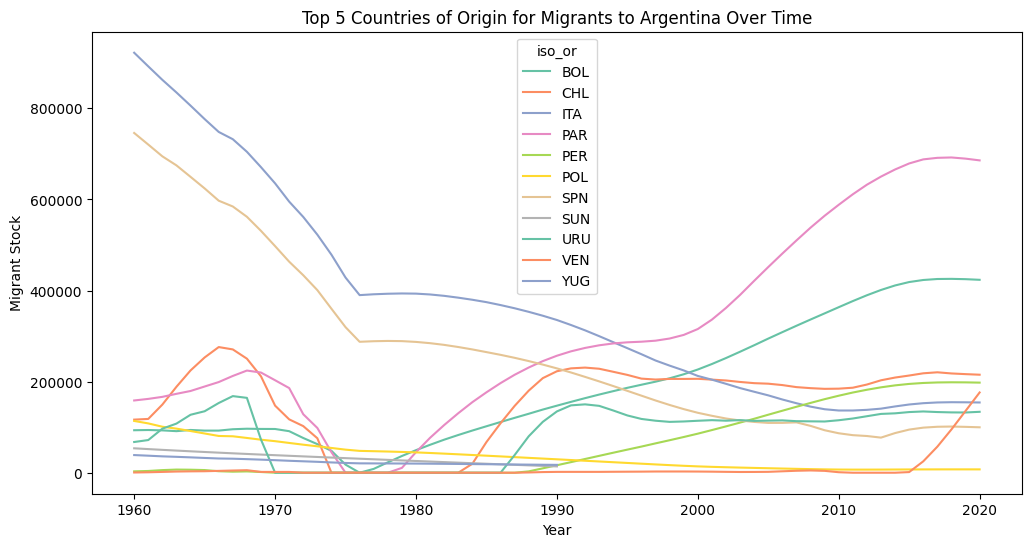

In [ ]:
# prompt: grafico de linea de stock del dataframe  top5_iso_or_arg por year

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_or', data=historic_top5_arg, palette = "Set2")
plt.title('Top 5 Countries of Origin for Migrants to Argentina Over Time')
plt.xlabel('Year')
plt.ylabel('Migrant Stock')
plt.show()

In [ ]:
top5_iso_or_chl = latam_mig_df[latam_mig_df['iso_des'] == 'CHL'].groupby(['year', 'iso_or'])['stock'].sum().reset_index()
top5_iso_or_chl = top5_iso_or_arg.sort_values(['year', 'stock'], ascending=[True, False]).groupby('year').head(5)

print(top5_iso_or_chl['iso_or'].unique())

['ITA' 'SPN' 'PAR' 'CHL' 'POL' 'URU' 'BOL' 'SUN' 'YUG' 'PER' 'VEN']


In [ ]:
origin_list=['ITA','SPN','PAR','CHL','POL','URU','BOL','SUN','YUG','PER','VEN']
historic_top5_chl = latam_mig_df[(latam_mig_df['iso_des'] == 'CHL') & (latam_mig_df['iso_or'].isin(origin_list))]
historic_top5_chl.head()

,iso_or,origin,iso_des,destination,year,stock,flow,inflow,outflow
334643,BOL,Bolivia,CHL,Chile,1960,8332,NaN,NaN,NaN
334644,BOL,Bolivia,CHL,Chile,1961,8382,141.0,NaN,NaN
334645,BOL,Bolivia,CHL,Chile,1962,8167,-126.0,NaN,NaN
334646,BOL,Bolivia,CHL,Chile,1963,7885,-197.0,NaN,NaN
334647,BOL,Bolivia,CHL,Chile,1964,7759,-46.0,NaN,NaN


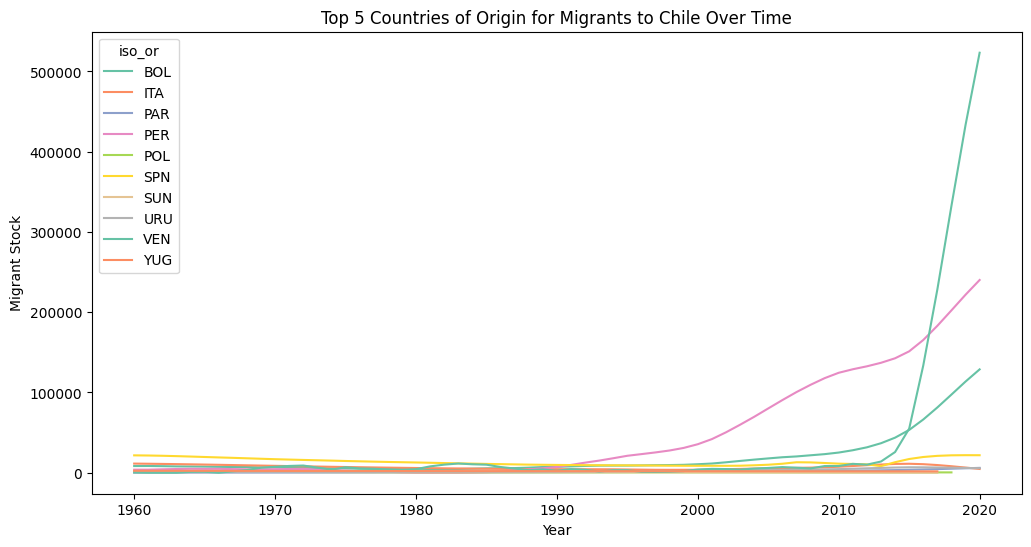

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_or', data=historic_top5_chl, palette = "Set2")
plt.title('Top 5 Countries of Origin for Migrants to Chile Over Time')
plt.xlabel('Year')
plt.ylabel('Migrant Stock')
plt.show()

### Stock of migrants born in VEN, CHL BOL and living Argentina and Chile

In [ ]:
# Filter latam_mig_df for iso_des ARG
migration_origin = latam_mig_df[latam_mig_df['iso_or'].isin(["BOL", "VEN", "CHL","ARG"])]
migration_origin.head()

,iso_or,origin,iso_des,destination,year,stock,flow,inflow,outflow
112567,ARG,Argentina,CHL,Chile,1960,12054,NaN,NaN,NaN
112568,ARG,Argentina,CHL,Chile,1961,12224,302.0,NaN,NaN
112569,ARG,Argentina,CHL,Chile,1962,12313,219.0,NaN,NaN
112570,ARG,Argentina,CHL,Chile,1963,12475,290.0,NaN,NaN
112571,ARG,Argentina,CHL,Chile,1964,12701,352.0,NaN,NaN


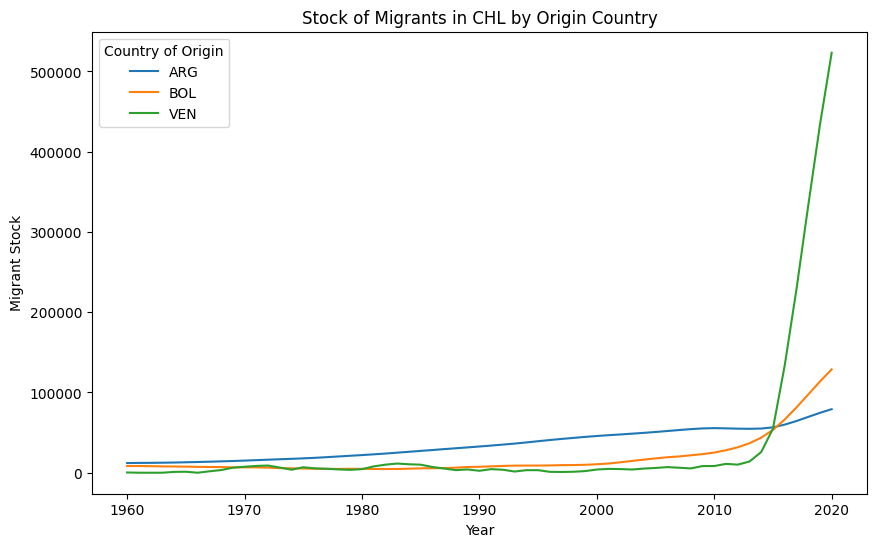

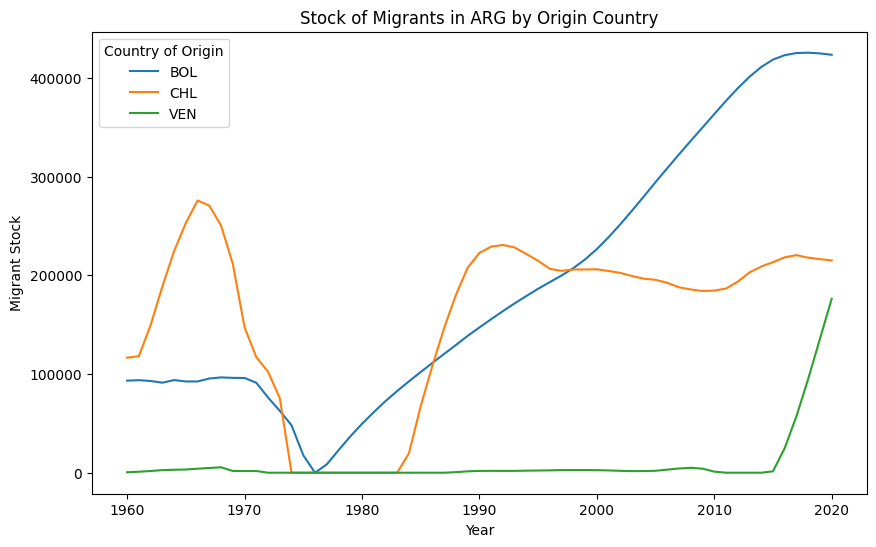

In [ ]:
# Iterate through unique destination countries
for iso_des in migration_origin['iso_des'].unique():
    # Filter data for the current destination country
    destination_data = migration_origin[migration_origin['iso_des'] == iso_des]

    plt.figure(figsize=(10, 6))

    # Iterate through unique origin countries for the current destination
    for iso_or in destination_data['iso_or'].unique():
        # Filter data for the current origin country
        origin_data = destination_data[destination_data['iso_or'] == iso_or]

        # Plot the line plot for the current origin country
        sns.lineplot(x='year', y='stock', data=origin_data, label=iso_or)

    # Set plot title and labels
    plt.title(f'Stock of Migrants in {iso_des} by Origin Country')
    plt.xlabel('Year')
    plt.ylabel('Migrant Stock')
    plt.legend(title='Country of Origin')
    plt.show()

Estos datos deben actualizarse con los datos más recientes censales y ajustar valores de población y migración con la información oficial.

### Datos administrativos migratorios ARG

Los datos son reconstrucciones de solicitudes de información pública y datos oficiales disponibles. Están incompletos pero son una referencia

In [ ]:
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/db_migracion.csv'

m_document_data = pd.read_csv(file_path)
m_document_data.head()

,country_code,year,value,origin,variable_name,indicator,fuente
0,ARG,2015,31028477,Total,entries_mouvements,Migration entries movements,DNM
1,ARG,2015,30911367,Total,exits_mouvements,Migration exit movement,DNM
2,ARG,2016,36405194,Total,entries_mouvements,Migration entries movements,DNM
3,ARG,2016,36431038,Total,exits_mouvements,Migration exit movement,DNM
4,ARG,2017,39680490,Total,entries_mouvements,Migration entries movements,DNM


In [ ]:
print(m_document_data['indicator'].unique())

['Migration entries movements' 'Migration exit movement'
 'Temporary residences' 'Permanent residence']


*reviso ingresos migratorios de cada pais*

Excluyo ingresos de Bolivianos y venez por ahora

In [ ]:
entries_mouvements_df = m_document_data[(m_document_data['variable_name'] == 'entries_mouvements') & (m_document_data['country_code'] == 'ARG')
& ( (m_document_data['origin'] == 'Total') | (m_document_data['origin'] == 'Total foreigners'))]
entries_mouvements_df


,country_code,year,value,origin,variable_name,indicator,fuente
0,ARG,2015,31028477,Total,entries_mouvements,Migration entries movements,DNM
2,ARG,2016,36405194,Total,entries_mouvements,Migration entries movements,DNM
4,ARG,2017,39680490,Total,entries_mouvements,Migration entries movements,DNM
6,ARG,2018,36681246,Total,entries_mouvements,Migration entries movements,DNM
8,ARG,2019,34411840,Total,entries_mouvements,Migration entries movements,DNM
10,ARG,2020,9704698,Total,entries_mouvements,Migration entries movements,DNM
12,ARG,2011,13241466,Total foreigners,entries_mouvements,Migration entries movements,DNM
13,ARG,2012,12723787,Total foreigners,entries_mouvements,Migration entries movements,DNM
14,ARG,2013,15680510,Total foreigners,entries_mouvements,Migration entries movements,DNM
15,ARG,2014,17298427,Total foreigners,entries_mouvements,Migration entries movements,DNM


In [ ]:
# tranform entries_mouvements_df value variable to integer
entries_mouvements_df['value'] = pd.to_numeric(entries_mouvements_df['value'], errors='coerce').fillna(0).astype(int)

<ipython-input-49-bc8f5e43508a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entries_mouvements_df['value'] = pd.to_numeric(entries_mouvements_df['value'], errors='coerce').fillna(0).astype(int)


In [ ]:
country_df_grouped = country_df.groupby(['target_iso3', 'year']).sum('estimated_trips').reset_index()
country_df_grouped.head()


,target_iso3,year,estimated_trips,dist
0,ARG,2011,12133921.0,2.072161e+06
1,ARG,2012,12678938.0,2.072161e+06
2,ARG,2013,12500972.0,2.072161e+06
3,ARG,2014,13044692.0,2.072161e+06
4,ARG,2015,15021604.0,2.072161e+06


In [ ]:
entries_mouvements_pivot = entries_mouvements_df.pivot_table(index=['year', 'country_code'], columns='origin', values='value')
entries_mouvements_pivot

,origin,Total,Total foreigners
year,country_code,,
2011,ARG,NaN,13241466.0
2012,ARG,NaN,12723787.0
2013,ARG,NaN,15680510.0
2014,ARG,NaN,17298427.0
2015,ARG,31028477.0,15993927.0
2016,ARG,36405194.0,NaN
2017,ARG,39680490.0,NaN
2018,ARG,36681246.0,15136781.0
2019,ARG,34411840.0,15760262.0


In [ ]:
merged_df = pd.merge(pivot_entries, country_df_grouped, how='left', left_on=['target_iso3','year'], right_on=['country_code', 'year'])

print(merged_df.head())

KeyError: 'country_code'

In [ ]:
country_df_grp

,year,target_iso3,source_region,estimated_trips,estimated_trips_total,percentage
0,2011,ARG,Africa,34801.0,12133921.0,0.286808
1,2011,ARG,Americas,10969123.0,12133921.0,90.400481
2,2011,ARG,Asia,122641.0,12133921.0,1.010729
3,2011,ARG,Europe,954411.0,12133921.0,7.865644
4,2011,ARG,Oceania,52945.0,12133921.0,0.436339
5,2011,CHL,Africa,33918.0,5916559.0,0.573272
6,2011,CHL,Americas,5272008.0,5916559.0,89.105982
7,2011,CHL,Asia,119612.0,5916559.0,2.021648
8,2011,CHL,Europe,430177.0,5916559.0,7.270729
9,2011,CHL,Oceania,60844.0,5916559.0,1.028368


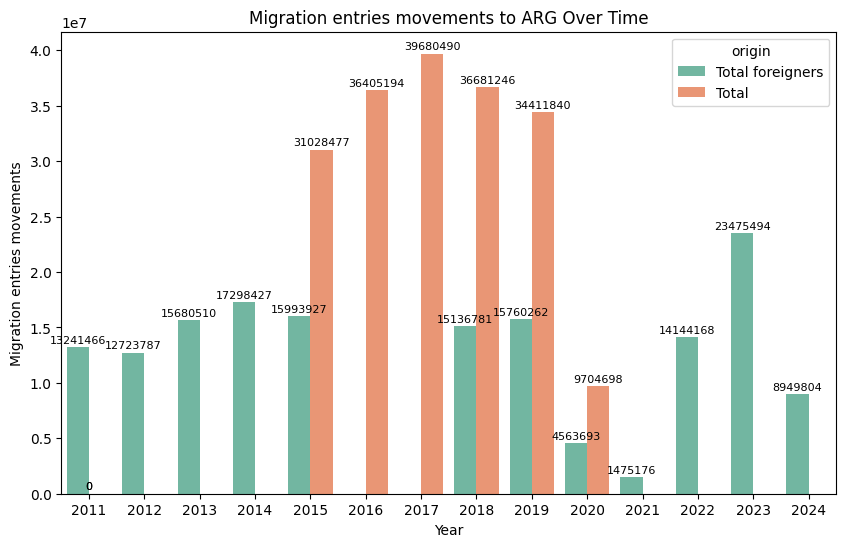

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='year', y='value', hue='origin', data=entries_mouvements_df, palette = "Set2")
plt.title('Migration entries movements to ARG Over Time')
plt.xlabel('Year')
plt.ylabel('Migration entries movements')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Combinar datos de movilidad con datos migratorios

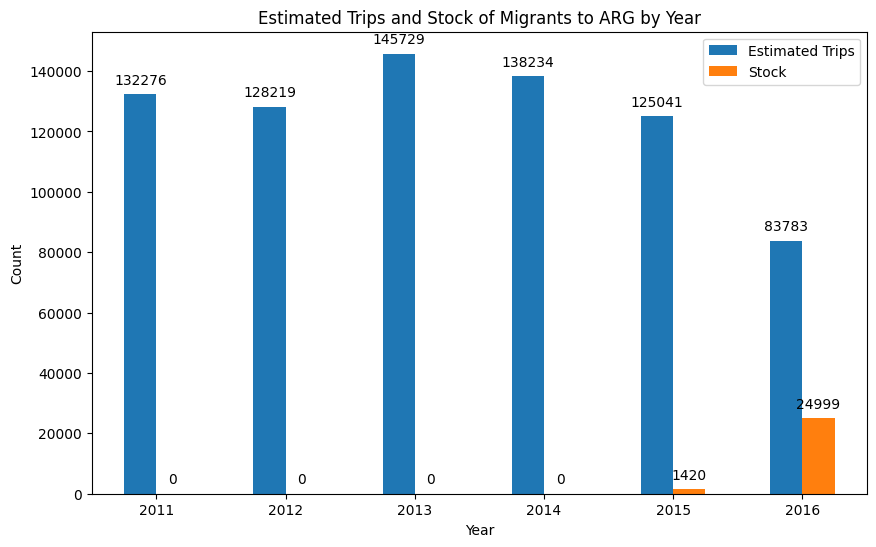

In [ ]:
# Create the bar chart
ax = arg_grouped.plot(kind='bar', figsize=(10, 6))

# Add labels to bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Estimated Trips and Stock of Migrants to ARG by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Estimated Trips', 'Stock'])
plt.show()

In [ ]:
# prompt: crear una pivot table con ven_df que tenga el year en cada fila y las columnas sean ARG-stock ARG-estimated_trips CHL-Stock CHL-estimated_trips

# Create a pivot table with year in rows and ARG-stock, ARG-estimated_trips, CHL-Stock, CHL-estimated_trips as columns
pivot_ven_df = ven_df.pivot_table(index='year', columns='target_iso3', values=['stock', 'estimated_trips'], aggfunc='sum')

pivot_ven_df

estimated_trips           stock        
target_iso3             ARG      CHL    ARG     CHL
year                                               
2011               132276.0  83841.0      0   11040
2012               128219.0  63198.0      0   10070
2013               145729.0  56746.0      0   13951
2014               138234.0  50523.0      0   25772
2015               125041.0  60878.0   1420   54887
2016                83783.0  83651.0  24999  133624

In [ ]:
# Rename columns for clarity
pivot_ven_df = pivot_ven_df.rename(columns={
    ('stock', 'ARG'): 'ARG-stock',
    ('estimated_trips', 'ARG'): 'ARG-estimated_trips',
    ('stock', 'CHL'): 'CHL-stock',
    ('estimated_trips', 'CHL'): 'CHL-estimated_trips'
})

pivot_ven_df

estimated_trips           stock        
target_iso3             ARG      CHL    ARG     CHL
year                                               
2011               132276.0  83841.0      0   11040
2012               128219.0  63198.0      0   10070
2013               145729.0  56746.0      0   13951
2014               138234.0  50523.0      0   25772
2015               125041.0  60878.0   1420   54887
2016                83783.0  83651.0  24999  133624

<Figure size 1200x600 with 0 Axes>

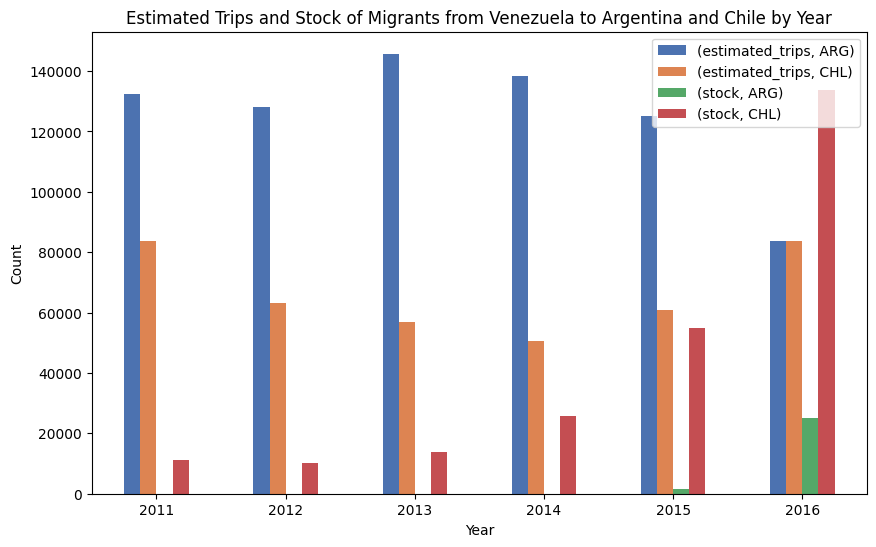

In [ ]:
# prompt: create a barplot with pivot_ven_df with seaborn and deep palette colors

plt.figure(figsize=(12, 6))
sns.set_palette("deep")  # Use the "deep" palette
pivot_ven_df.plot(kind='bar', figsize=(10, 6))
plt.title('Estimated Trips and Stock of Migrants from Venezuela to Argentina and Chile by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

## Bolivian migration to Chile and Argentina


In [ ]:
# Filter data for source_iso3 'VEN' and target_iso2 'CHL' and 'ARG'
bol_df = mob_and_mig[(mob_and_mig['source_iso3'] == 'BOL') & (mob_and_mig['target_iso3'].isin(['CHL', 'ARG']))]
bol_df = bol_df[['source_iso3', 'target_iso3', 'year', 'estimated_trips', 'stock', 'flow']]

In [ ]:

# Filter data for target_iso3 'ARG'
arg_df = bol_df[bol_df['target_iso3'] == 'ARG']
chl_df = bol_df[bol_df['target_iso3'] == 'CHL']

# Group by year and get the sum of estimated_trips and stock
arg_grouped = arg_df.groupby('year').agg({'estimated_trips': 'sum', 'stock': 'sum'})
chl_grouped = chl_df.groupby('year').agg({'estimated_trips': 'sum', 'stock': 'sum'})



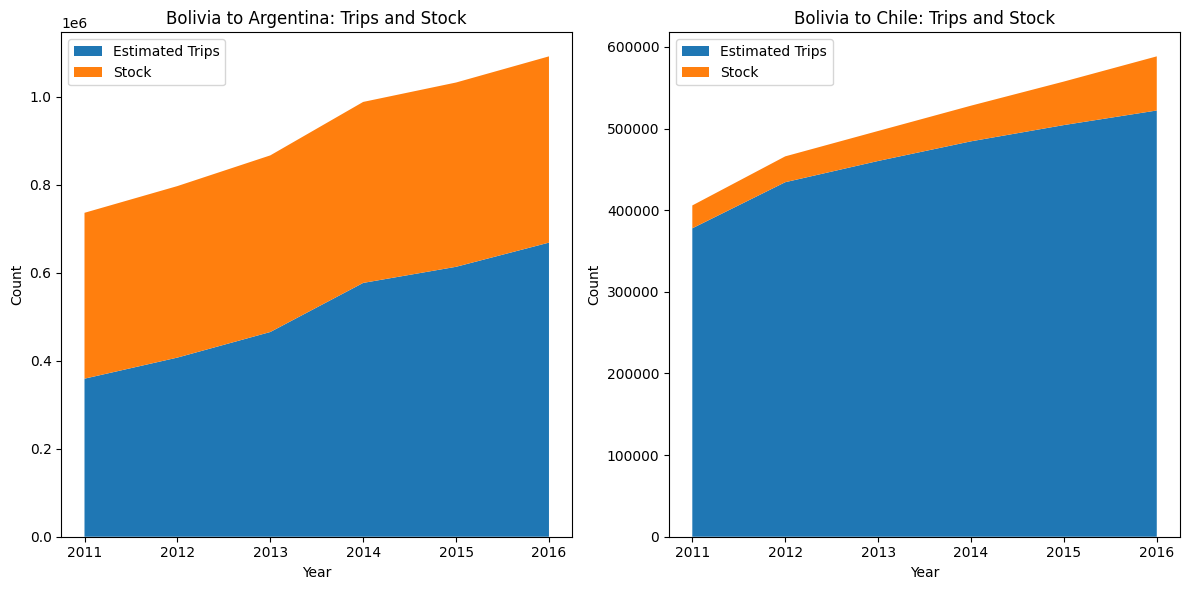

In [ ]:
# prompt: crear una grilla con dos stackplot uno usando arg_grouped y otro chl_grouped

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.stackplot(arg_grouped.index, arg_grouped['estimated_trips'], arg_grouped['stock'],
              labels=['Estimated Trips', 'Stock'], colors=['#1f77b4', '#ff7f0e'])
plt.title('Bolivia to Argentina: Trips and Stock')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.stackplot(chl_grouped.index, chl_grouped['estimated_trips'], chl_grouped['stock'],
              labels=['Estimated Trips', 'Stock'], colors=['#1f77b4', '#ff7f0e'])
plt.title('Bolivia to Chile: Trips and Stock')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

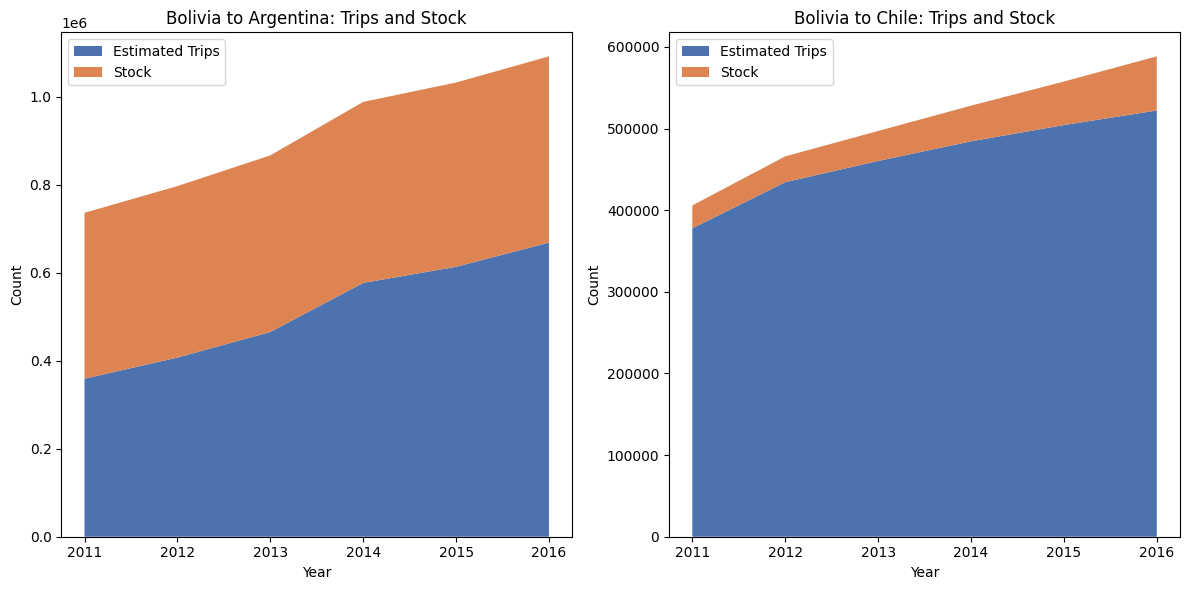

In [ ]:
# prompt: crear una grilla con dos stackplot uno usando arg_grouped y otro chl_grouped usando seaborn and deep palette colors

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.stackplot(arg_grouped.index, arg_grouped['estimated_trips'], arg_grouped['stock'],
              labels=['Estimated Trips', 'Stock'], colors=sns.color_palette("deep"))
plt.title('Bolivia to Argentina: Trips and Stock')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.stackplot(chl_grouped.index, chl_grouped['estimated_trips'], chl_grouped['stock'],
              labels=['Estimated Trips', 'Stock'], colors=sns.color_palette("deep"))
plt.title('Bolivia to Chile: Trips and Stock')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

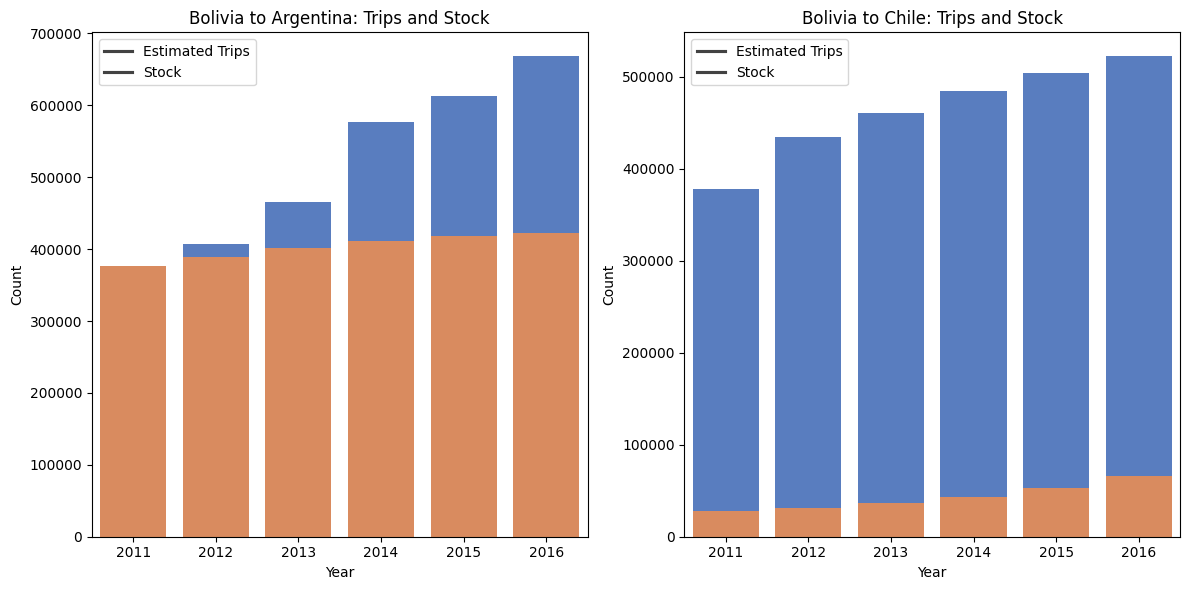

In [ ]:
# prompt: crear una grilla con dos barplots uno usando arg_grouped y otro chl_grouped usando seaborn and deep palette colors

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=arg_grouped.index, y=arg_grouped['estimated_trips'], color=sns.color_palette("muted")[0])
sns.barplot(x=arg_grouped.index, y=arg_grouped['stock'], color=sns.color_palette("muted")[1])
plt.title('Bolivia to Argentina: Trips and Stock')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Estimated Trips', 'Stock'])

plt.subplot(1, 2, 2)
sns.barplot(x=chl_grouped.index, y=chl_grouped['estimated_trips'], color=sns.color_palette("muted")[0])
sns.barplot(x=chl_grouped.index, y=chl_grouped['stock'], color=sns.color_palette("muted")[1])
plt.title('Bolivia to Chile: Trips and Stock')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Estimated Trips', 'Stock'])

plt.tight_layout()
plt.show()